In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

正弦関数に正規分布のノイズを載せたデータセットを生成する関数を定義します。

これは、0≦x≦1 の区間を等分した num 個の点 x に対して、対応する y の値を生成します。

In [2]:
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset

例として、10個のデータをトレーニングセットとして生成します。

In [3]:
train_set = create_dataset(10)

In [4]:
train_set

,x,y
0,0.000000,0.037401
1,0.111111,0.295997
2,0.222222,1.054565
3,0.333333,1.293890
4,0.444444,0.088362
5,0.555556,-0.441398
6,0.666667,-0.959050
7,0.777778,-0.382559
8,0.888889,-1.025525
9,1.000000,-0.355797


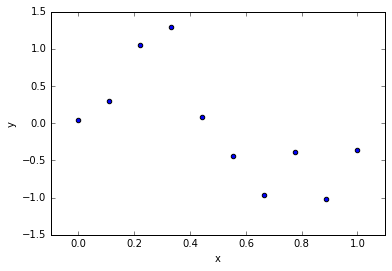

In [5]:
train_set.plot(kind='scatter', x='x', y='y',
             xlim=[-0.1,1.1], ylim=[-1.5,1.5])

In [6]:
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return f

In [7]:
def resolve_debug(dataset, m):
    t = dataset.y
    
    print "\nt:"
    print t
    
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)

    print "\nphi:"
    print phi
    
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    print "\nws:"
    print ws
    
    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return f

In [8]:
f = resolve_debug(train_set, 3)


t:
0    0.037401
1    0.295997
2    1.054565
3    1.293890
4    0.088362
5   -0.441398
6   -0.959050
7   -0.382559
8   -1.025525
9   -0.355797
Name: y, dtype: float64

phi:
   x**0      x**1      x**2      x**3
0   1.0  0.000000  0.000000  0.000000
1   1.0  0.111111  0.012346  0.001372
2   1.0  0.222222  0.049383  0.010974
3   1.0  0.333333  0.111111  0.037037
4   1.0  0.444444  0.197531  0.087791
5   1.0  0.555556  0.308642  0.171468
6   1.0  0.666667  0.444444  0.296296
7   1.0  0.777778  0.604938  0.470508
8   1.0  0.888889  0.790123  0.702332
9   1.0  1.000000  1.000000  1.000000

ws:
[ -0.08997674   9.98295178 -28.40666598  18.19449829]


得られた関数 f(x) に対して、トレーニングセットに対する平方根平均二乗誤差（RMS）を求める関数を用意します。

In [9]:
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

In [10]:
def show_rms_trend(train_set, test_set):
    df = DataFrame(columns=['Training set','Test set'])
    for m in range(0,10):   # 多項式の次数
        f = resolve(train_set, m)
        train_error = rms_error(train_set, f)
        test_error = rms_error(test_set, f)
        df = df.append(Series([train_error, test_error],
                              index=['Training set','Test set']),
                       ignore_index=True)
    df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0,0.9))

In [13]:
def show_rms_trend_debug(train_set, test_set):
    df = DataFrame(columns=['Training set','Test set'])
    for m in range(0,10):   # 多項式の次数
        f = resolve(train_set, m)
        train_error = rms_error(train_set, f)
        test_error = rms_error(test_set, f)
        df = df.append(Series([train_error, test_error],
                              index=['Training set','Test set']),
                       ignore_index=True)
    
    print df
    
    df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0,0.9))

   Training set  Test set
0      0.666683  0.667264
1      0.446041  0.615923
2      0.436804  0.601594
3      0.238787  0.329494
4      0.238171  0.328945
5      0.238141  0.329865
6      0.236387  0.338968
7      0.234702  0.334412
8      0.131603  0.377848
9      0.000236  0.393753


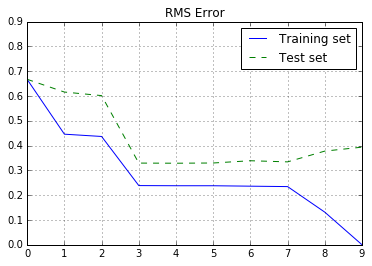

In [14]:
train_set = create_dataset(10)
test_set = create_dataset(10)
show_rms_trend_debug(train_set, test_set)